© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0

# 14 Refining Polygon Mask in high-density data areas

This notebook illustrates how to refine the polygon mask adding additional smaller polygons in high-density data areas.

## Importing Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

from pyheatdemand import processing 

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading Heat Demand Data

The heat demand data utilized here can be downloaded from https://www.opengeodata.nrw.de/produkte/umwelt_klima/klima/raumwaermebedarfsmodell/.

In [29]:
data = gpd.read_file('../../../../../Downloads/Notebooks/HD_Aachen.shp')
data

,OBJECTID,Fest_ID,spez_WB_HU,WB_HU,geometry
0,40.0,10000292,0.000000,0.000000,"POLYGON Z ((3729488.154 2675846.462 0.000, 372..."
1,41.0,10000293,0.000000,0.000000,"POLYGON Z ((3729487.353 2675845.779 0.000, 372..."
2,42.0,10000294,0.000000,0.000000,"POLYGON Z ((3729494.339 2675836.021 0.000, 372..."
3,43.0,10000295,0.000000,0.000000,"POLYGON Z ((3729493.781 2675833.641 0.000, 372..."
4,193.0,10001841,148.501500,237718.443608,"POLYGON Z ((3733429.797 2680405.183 0.000, 373..."
...,...,...,...,...,...
193361,2139002.0,249219,138.632092,16887.502341,"POLYGON Z ((3736358.156 2677252.398 0.000, 373..."
193362,2139003.0,249220,0.000000,0.000000,"POLYGON Z ((3736356.043 2677254.457 0.000, 373..."
193363,2139004.0,249221,0.000000,0.000000,"POLYGON Z ((3736364.286 2677250.432 0.000, 373..."
193364,3556749.0,1670883,0.000000,0.000000,"POLYGON Z ((3743898.286 2684862.227 0.000, 374..."


## Creating the first mask

The first mask is created as in any other tutorials before.

In [3]:
grid = processing.create_polygon_mask(data, 1600)
grid

,geometry
0,"POLYGON ((3726138.177 2668547.374, 3727738.177..."
1,"POLYGON ((3726138.177 2670147.374, 3727738.177..."
2,"POLYGON ((3726138.177 2671747.374, 3727738.177..."
3,"POLYGON ((3726138.177 2673347.374, 3727738.177..."
4,"POLYGON ((3726138.177 2674947.374, 3727738.177..."
...,...
127,"POLYGON ((3743738.177 2678147.374, 3745338.177..."
128,"POLYGON ((3743738.177 2679747.374, 3745338.177..."
129,"POLYGON ((3743738.177 2681347.374, 3745338.177..."
130,"POLYGON ((3743738.177 2682947.374, 3745338.177..."


## Plotting the data and the mask

<Axes: >

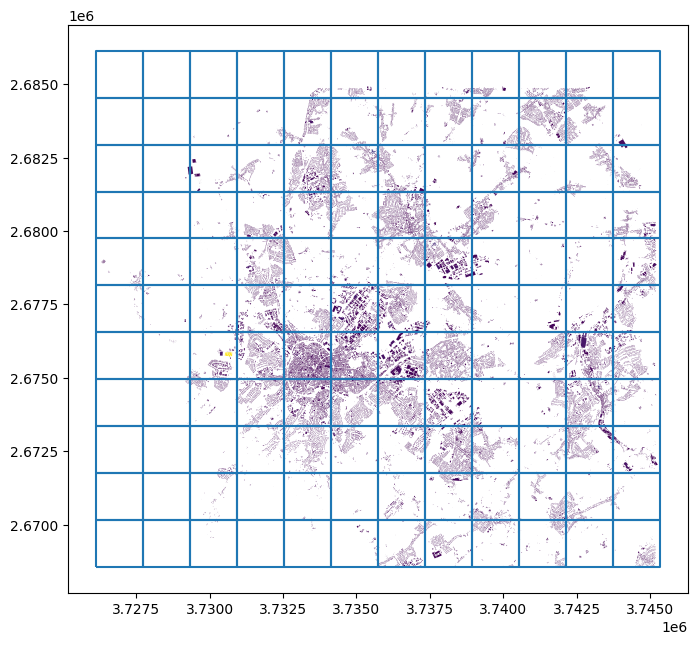

In [4]:
fig, ax = plt.subplots(1, figsize=(8,8))
grid.boundary.plot(ax=ax)
data.plot(ax=ax, column='WB_HU')

## Refining the mask

The mask is refined using the `refine_mask` function that will be called four times here now.

In [63]:
[0,1,2,3]

TypeError: can only concatenate list (not "int") to list

In [68]:
from typing import Union
def quad_tree_mask_refinement(grid: gpd.GeoDataFrame,
                              data: gpd.GeoDataFrame,
                              max_depth: int = 4, 
                              num_of_points: Union[int, list] = 100) -> gpd.GeoDataFrame:
    """

    """

    original_cell_size = np.sqrt(grid.iloc[0].geometry.area)

    if isinstance(num_of_points, int):
        num_of_points = [num_of_points]*max_depth

    for i in range(max_depth):
        print(num_of_points[i])
        print(int(original_cell_size/2**(i+1)))

        if i == 0:
            area_limit= None
        else:
            area_limit= int(original_cell_size/2**(i)) * int(original_cell_size/2**(i))
        
        grid = processing.refine_mask(mask=grid, 
                                      data=data, 
                                      num_of_points=num_of_points[i], 
                                      cell_size=int(original_cell_size/2**(i+1)),
                                      area_limit=area_limit)
    return grid

grid_ref4 = quad_tree_mask_refinement(grid, data, max_depth= 4, num_of_points = [150, 150, 100, 50])
grid_ref4

150
800
150
400
100
200
50
100


,geometry
0,"POLYGON ((3726138.177 2668547.374, 3727738.177..."
1,"POLYGON ((3726138.177 2670147.374, 3727738.177..."
2,"POLYGON ((3726138.177 2671747.374, 3727738.177..."
3,"POLYGON ((3726138.177 2673347.374, 3727738.177..."
4,"POLYGON ((3726138.177 2674947.374, 3727738.177..."
...,...
7030,"POLYGON ((3744238.177 2682047.374, 3744338.177..."
7031,"POLYGON ((3744338.177 2681747.374, 3744438.177..."
7032,"POLYGON ((3744338.177 2681847.374, 3744438.177..."
7033,"POLYGON ((3744438.177 2681747.374, 3744538.177..."


<Axes: >

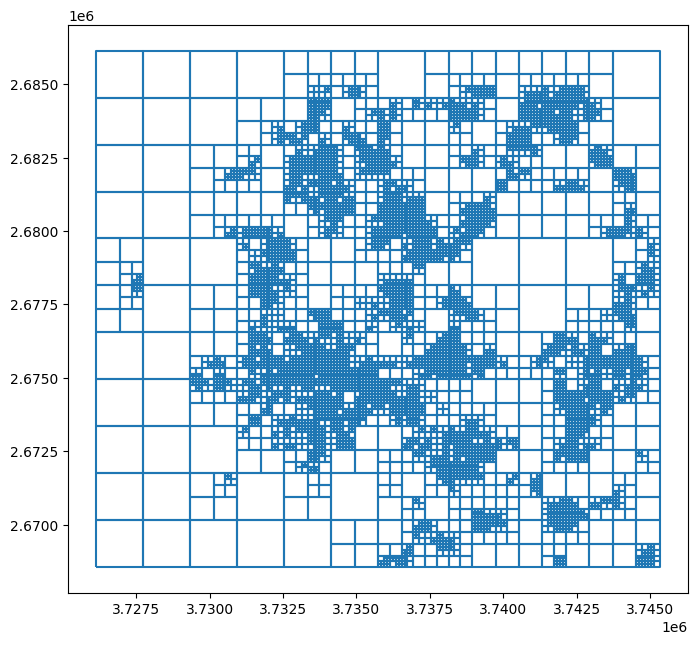

In [5]:
grid_ref1 = processing.refine_mask(grid, data, num_of_points=150, cell_size=800)
grid_ref2 = processing.refine_mask(grid_ref1, data, num_of_points=150, cell_size=400, area_limit=800*800)
grid_ref3 = processing.refine_mask(grid_ref2, data, num_of_points=100, cell_size=200, area_limit=400*400)
grid_ref4 = processing.refine_mask(grid_ref3, data, num_of_points=50, cell_size=100, area_limit=200*200)

fig, ax = plt.subplots(1, figsize=(8,8))
grid_ref4.boundary.plot(ax=ax)

## Calculating the Heat Demand

In [6]:
hd = processing.calculate_hd_sindex(hd_gdf=data,
                                    mask_gdf=grid_ref4,
                                    hd_data_column='WB_HU')
hd

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,geometry,HD
0,"POLYGON ((3727738.177 2671747.374, 3729338.177...",1.390320e+05
1,"POLYGON ((3727738.177 2673347.374, 3729338.177...",9.952524e+05
2,"POLYGON ((3727738.177 2674947.374, 3729338.177...",1.505710e+06
3,"POLYGON ((3727738.177 2676547.374, 3729338.177...",7.207101e+05
4,"POLYGON ((3727738.177 2678147.374, 3729338.177...",5.432950e+05
...,...,...
6634,"POLYGON ((3744138.177 2681947.374, 3744238.177...",3.471389e+05
6635,"POLYGON ((3744238.177 2681947.374, 3744338.177...",1.249610e+05
6636,"POLYGON ((3744338.177 2681747.374, 3744438.177...",7.055315e+05
6637,"POLYGON ((3744338.177 2681847.374, 3744438.177...",0.000000e+00


## Plotting the Heat Demand Map

<Axes: >

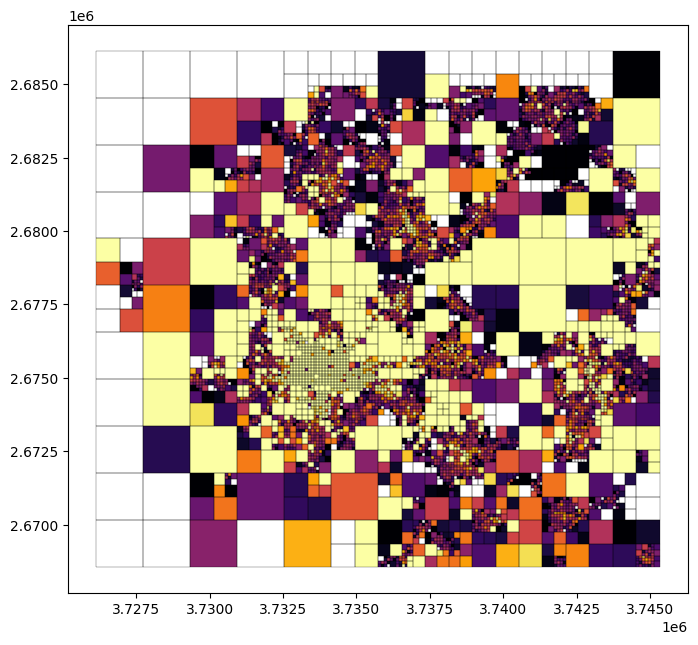

In [7]:
fig, ax = plt.subplots(1, figsize=(8,8))
hd.plot(ax=ax, column='HD', cmap='inferno', vmax=1e6)
grid_ref4.boundary.plot(ax=ax, color='black', linewidth=0.2)

## Plotting all maps together

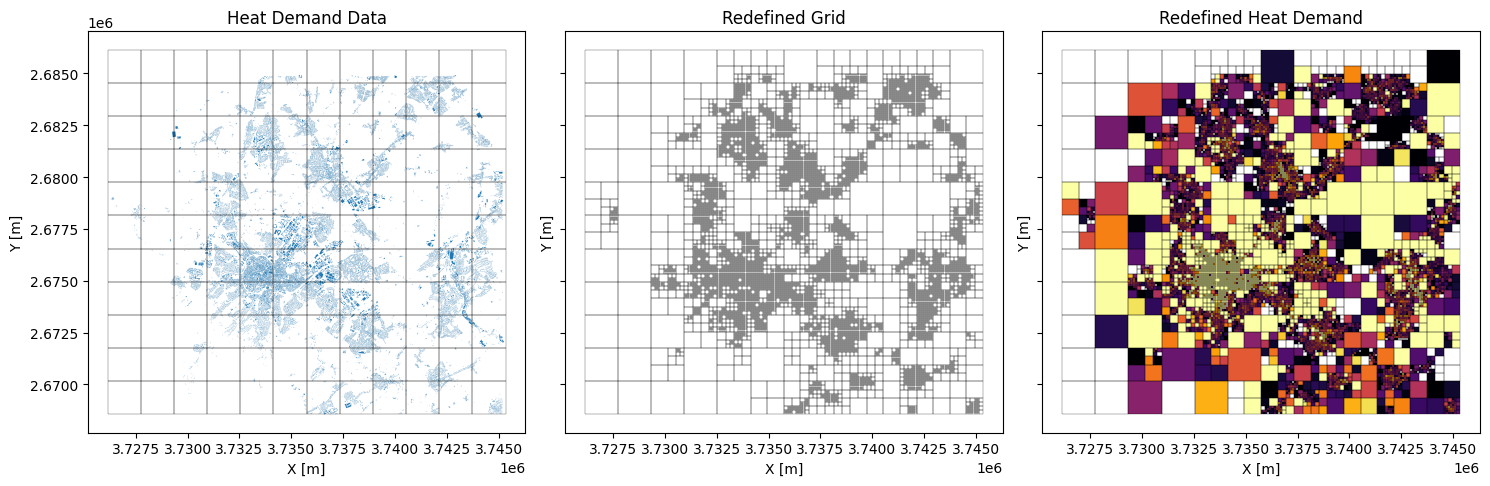

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)

grid.boundary.plot(ax=ax[0], color='black', linewidth=0.2)
data.plot(ax=ax[0])#, linewidth=1)
ax[0].set_xlabel('X [m]')
ax[0].set_ylabel('Y [m]')
ax[0].set_title('Heat Demand Data')

grid_ref4.boundary.plot(ax=ax[1], color='black', linewidth=0.2)
ax[1].set_xlabel('X [m]')
ax[1].set_ylabel('Y [m]')
ax[1].set_title('Redefined Grid')

hd.plot(ax=ax[2], column='HD', cmap='inferno', vmax=1e6)
grid_ref4.boundary.plot(ax=ax[2], color='black', linewidth=0.2)

ax[2].set_xlabel('X [m]')
ax[2].set_ylabel('Y [m]')
ax[2].set_title('Redefined Heat Demand')

plt.tight_layout()

plt.savefig('Grid_Refinement.png', dpi=600)

## Histogram of the Heat Demand distribution

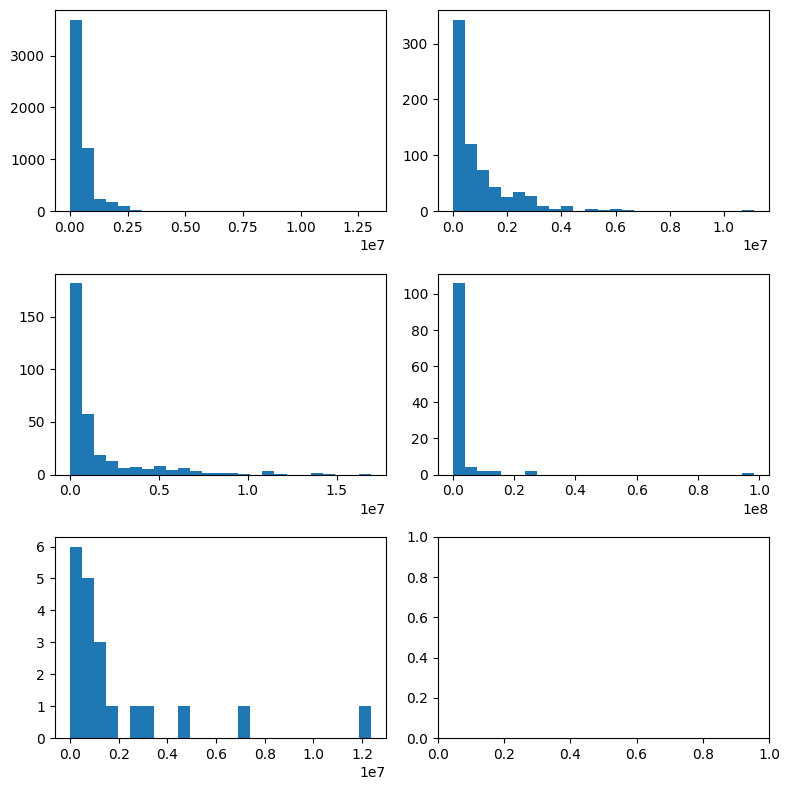

In [8]:
fig, ax = plt.subplots(3,2, figsize=(8,8))

ax[0][0].hist(hd['HD'][hd.area==10000].values, bins=25);
ax[0][1].hist(hd['HD'][hd.area==40000].values, bins=25);
ax[1][0].hist(hd['HD'][hd.area==160000].values, bins=25);
ax[1][1].hist(hd['HD'][hd.area==640000].values, bins=25);
ax[2][0].hist(hd['HD'][hd.area==2560000].values, bins=25);

plt.tight_layout()